In [280]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import more_itertools

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler

# Sklearn ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC


In [258]:
# Load the data
filepath = "data/train.csv"
class_df = pd.read_csv(
    filepath, usecols=[1, 2], header=0, names=["uid", "class"]
)

display(class_df)

,uid,class
0,ZYURRE527,4
1,ZWNWBP435,0
2,ZVHEZA963,4
3,ZSFNU1100,4
4,ZRXUB1049,0
...,...,...
422,AGHXWX765,0
423,AFEOPC672,3
424,AEEEIG737,3
425,ADQRPH513,3


In [259]:
# Load features from individual CSVs into a single dataframe
def get_features(uid):
    feature_filepath = f"data/img_details/{uid}.csv"
    feature_df = pd.read_csv(feature_filepath, header=None)
    return feature_df.iloc[0].values.tolist()


features_df = class_df[["uid"]].apply(
    lambda row: get_features(row[0]), axis=1, result_type="expand"
)
display(features_df)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.000462,0.005583,-0.001031,0.002307,-0.113097,-0.284965,0.001069,-0.000092,-0.271864,0.000503,...,0.680631,-1.153061,0.111816,0.162622,-1.085265,-0.657002,-1.406191,2.240085,0.118616,-0.728013
1,0.000220,0.006780,-0.000547,0.002183,-0.045820,-0.216762,0.000987,-0.001331,-0.465898,0.000515,...,-1.241972,-0.115316,-0.411191,0.431461,0.442649,1.243681,-0.151721,0.458508,1.931918,-0.241081
2,0.000405,0.007183,-0.000137,0.002612,-0.083430,-0.292385,0.001094,-0.000112,-0.236576,0.000466,...,0.659314,-0.792833,-0.471358,0.514799,-0.846220,0.479314,-0.730218,1.352716,0.040223,-0.163302
3,0.000388,0.003802,0.002121,0.001513,-0.109248,-0.183284,0.000813,-0.001447,-0.066267,0.000654,...,-0.047666,-0.201043,-0.565545,0.999009,-0.332314,-0.066972,-1.263785,3.876905,-0.397950,-0.693763
4,0.000425,0.006544,0.001630,0.001549,-0.068301,-0.283487,0.001004,-0.001800,-0.251112,0.000428,...,-1.221178,-0.253239,-0.046740,0.242367,-0.379724,-0.893249,-0.957397,1.118245,0.181925,-0.024197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0.000305,0.003671,-0.004093,0.003010,-0.093583,0.133018,0.000627,0.001443,-0.367352,0.000462,...,-0.260746,-0.741712,-0.887129,0.190525,0.216271,0.490549,-1.047399,1.875185,0.345561,-0.874318
423,0.000441,0.006178,-0.000811,0.003572,-0.108863,-0.302020,0.000761,0.001851,-0.197981,0.000310,...,0.457373,-0.782917,-1.072765,1.180279,-0.111142,1.897755,-0.902370,0.552967,-0.314270,-1.198762
424,0.000464,0.006611,0.000842,0.001412,-0.152744,-0.355706,0.000906,-0.001229,-0.320724,0.000493,...,0.411773,0.232481,-0.527885,-0.305296,-0.189008,-0.592684,-1.144780,3.459698,-0.199579,-0.999165
425,0.000233,0.003029,0.001606,0.001224,-0.092386,-0.434045,0.000668,-0.000410,-0.228858,0.000444,...,-0.147889,1.168724,-0.486698,1.134707,-0.029372,0.092189,-0.791921,1.786787,2.089036,-0.690614


In [260]:
# Merge dataframes and fix column names
num_features = features_df.shape[1]
feature_names = [f"f{i}" for i in range(num_features)]

features_df.columns = feature_names

df = pd.concat([class_df, features_df], axis=1)
display(df)

,uid,class,f0,f1,f2,f3,f4,f5,f6,f7,...,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023
0,ZYURRE527,4,0.000462,0.005583,-0.001031,0.002307,-0.113097,-0.284965,0.001069,-0.000092,...,0.680631,-1.153061,0.111816,0.162622,-1.085265,-0.657002,-1.406191,2.240085,0.118616,-0.728013
1,ZWNWBP435,0,0.000220,0.006780,-0.000547,0.002183,-0.045820,-0.216762,0.000987,-0.001331,...,-1.241972,-0.115316,-0.411191,0.431461,0.442649,1.243681,-0.151721,0.458508,1.931918,-0.241081
2,ZVHEZA963,4,0.000405,0.007183,-0.000137,0.002612,-0.083430,-0.292385,0.001094,-0.000112,...,0.659314,-0.792833,-0.471358,0.514799,-0.846220,0.479314,-0.730218,1.352716,0.040223,-0.163302
3,ZSFNU1100,4,0.000388,0.003802,0.002121,0.001513,-0.109248,-0.183284,0.000813,-0.001447,...,-0.047666,-0.201043,-0.565545,0.999009,-0.332314,-0.066972,-1.263785,3.876905,-0.397950,-0.693763
4,ZRXUB1049,0,0.000425,0.006544,0.001630,0.001549,-0.068301,-0.283487,0.001004,-0.001800,...,-1.221178,-0.253239,-0.046740,0.242367,-0.379724,-0.893249,-0.957397,1.118245,0.181925,-0.024197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,AGHXWX765,0,0.000305,0.003671,-0.004093,0.003010,-0.093583,0.133018,0.000627,0.001443,...,-0.260746,-0.741712,-0.887129,0.190525,0.216271,0.490549,-1.047399,1.875185,0.345561,-0.874318
423,AFEOPC672,3,0.000441,0.006178,-0.000811,0.003572,-0.108863,-0.302020,0.000761,0.001851,...,0.457373,-0.782917,-1.072765,1.180279,-0.111142,1.897755,-0.902370,0.552967,-0.314270,-1.198762
424,AEEEIG737,3,0.000464,0.006611,0.000842,0.001412,-0.152744,-0.355706,0.000906,-0.001229,...,0.411773,0.232481,-0.527885,-0.305296,-0.189008,-0.592684,-1.144780,3.459698,-0.199579,-0.999165
425,ADQRPH513,3,0.000233,0.003029,0.001606,0.001224,-0.092386,-0.434045,0.000668,-0.000410,...,-0.147889,1.168724,-0.486698,1.134707,-0.029372,0.092189,-0.791921,1.786787,2.089036,-0.690614


In [261]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_all = df[feature_names]
y_all = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.15, random_state=666, stratify=y_all
)

# Reset X_train index
y_train.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)

print("Training set by class:")
display(y_train.value_counts())
print("Test set by class:")
display(y_test.value_counts())

Training set by class:


0    135
4     92
3     66
1     46
2     23
Name: class, dtype: int64

Test set by class:


0    24
4    17
3    12
1     8
2     4
Name: class, dtype: int64

### Helper Functions - Splitting Data

In [262]:
# Define a helper function analyze a classifier with k-fold cross validation
def analyze_classifier_with_k_folds(classifier, n_splits=5, random_state=42):
    classifiers = []
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        classifier.fit(X_train_fold, y_train_fold)
        classifiers.append(classifier)

        y_pred = classifier.predict(X_test_fold)

        accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
        f1_scores.append(f1_score(y_test_fold, y_pred, average="weighted"))
        precision_scores.append(
            precision_score(y_test_fold, y_pred, average="weighted")
        )
        recall_scores.append(recall_score(y_test_fold, y_pred, average="weighted"))

    return classifiers, {
        "accuracy": pd.Series(accuracy_scores).describe().to_dict(),
        "f1": pd.Series(f1_scores).describe().to_dict(),
        "precision": pd.Series(precision_scores).describe().to_dict(),
        "recall": pd.Series(recall_scores).describe().to_dict(),
    }

In [263]:
# Define a helper to analyze a classifier with the whole training/test sets
def analyze_classifier(classifier, X_train, y_train, random_state=42):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    return classifier, {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred, average="weighted"),
        "precision": precision_score(y_test, y_pred, average="weighted"),
        "recall": recall_score(y_test, y_pred, average="weighted"),
    }

### Normalizing Data

Use MaxAbsScaler from sklearn. This scales each feature by its maximum absolute value.

In [264]:
# Setup scaler
#scaler_std = StandardScaler()
scaler_abs = MaxAbsScaler()
# Apply scaling to training data
X_norm = scaler_abs.fit_transform(X_train)

### Remove Outliers

Standard deviation approach - For each class, features with values more than +/- 3 standard deviations away from the per class per feature mean will be removed.

Since we are in multi-dimensional space, we will use the mean and covariance matrices. This will be computed using Mahalanobis distance which is well-suited for multi-dimensional space: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html.

In [265]:
# Merge dfs
#norm_x_df = pd.DataFrame(X_norm, columns=feature_names)
norm_df = pd.concat([y_train, X_train], axis=1)

# Compute mean and cov per class per feature
avg_list = []
cov_list = []
inv_cov_list = []
for i in range(5):
    # Compute mean
    avg = np.mean(norm_df[norm_df["class"]==i][feature_names], axis=0)
    avg_list.append(avg)
    # Compute cov matrix
    cov = np.cov(norm_df[norm_df["class"]==i][feature_names], rowvar=False)
    cov_list.append(cov)
    # Compute inverse of cov matrix
    inv_cov = np.linalg.inv(cov)
    inv_cov_list.append(inv_cov)

#display(avg_list)

In [266]:
# Determine which features should be removed (identify outliers based on Mahalanobis dist)
# Create function that computes Mahalanobis distance and adds it to norm_df
def get_mahalanobis_dist(label, features):
    u = avg_list[label]
    v = features
    vi = inv_cov_list[label]
    delta = u - v
    m = np.dot(np.dot(delta, vi), delta)
    #dist = distance.mahalanobis(u, features, vi)
    return np.sqrt(np.abs(m))

# Call function for each feature
norm_df["mahalanobis_dist"] = norm_df.apply(lambda row: get_mahalanobis_dist(int(row["class"]), row[feature_names]), axis=1)
norm_df["mahalanobis_dist"].describe()

# Initialize list for distances
# dist = np.zeros(norm_df.shape[0])
# for i, row in norm_df.iterrows():
#     dist[i] = get_mahalanobis_dist(int(row["class"]), row[feature_names])

count    362.000000
mean      22.660541
std       10.602291
min        1.117566
25%       14.876235
50%       21.695645
75%       29.436725
max       57.164377
Name: mahalanobis_dist, dtype: float64

Distances seem high, but we may have a lot of outliers! Plus there are so many features that the sum becomes large. The distance was calculated for all 362 image feature vectors in the training dataset, so we can move on to the next step.

In [267]:
# Drop outliers
thresh = 0.1
norm_df.sort_values(by="mahalanobis_dist", ascending=False, inplace=True)
norm_df.reset_index(inplace=True, drop=True)
norm_df.drop(norm_df.index[:int(norm_df.shape[0]*thresh)], inplace=True)
norm_df.reset_index(inplace=True, drop=True)

# Print updated descriptive stats
norm_df["mahalanobis_dist"].describe()
#print(len(norm_df["class"]))

count    326.000000
mean      20.334085
std        8.200129
min        1.117566
25%       14.341529
50%       20.243233
75%       27.018263
max       36.217077
Name: mahalanobis_dist, dtype: float64

In [268]:
# Get class counts after dropping outliers
print(norm_df["class"].value_counts())

0    115
4     92
3     66
1     40
2     13
Name: class, dtype: int64


### Addressing Class Imbalance with ADASYN

In [269]:
# Setup ADASYN
ada = ADASYN(random_state=10)
# Apply ADASYN to oversample everything but the majority class (default behaviour)
X_res_norm, y_res = ada.fit_resample(X_norm, y_train)

# Observe number of classes after ADASYN
print(f"Number of samples per class after ADASYN:\n{y_res.value_counts()}")

Number of samples per class after ADASYN:
1    144
0    135
2    135
4    132
3    130
Name: class, dtype: int64


### Addressing Class Imbalance with ______

In [281]:
# Setup X and y train
X_train = norm_df[feature_names]
y_train = norm_df["class"]

# Setup 
rand_oversample = RandomOverSampler(random_state=10)
# Apply 
X_train, y_train = rand_oversample.fit_resample(X_train, y_train)
print(f"Number of samples per class after SMOTE:\n{y_train.value_counts()}")

Number of samples per class after SMOTE:
0    115
2    115
1    115
3    115
4    115
Name: class, dtype: int64


### Reduce Dimensionality - Linear Discriminant Analysis

In [282]:
# Linear Discriminant Analysis to reduce dimensionality of problem
lda_clf = LinearDiscriminantAnalysis()
lda_model = lda_clf.fit(X_train, y_train)
X_lda = lda_model.transform(X_train)

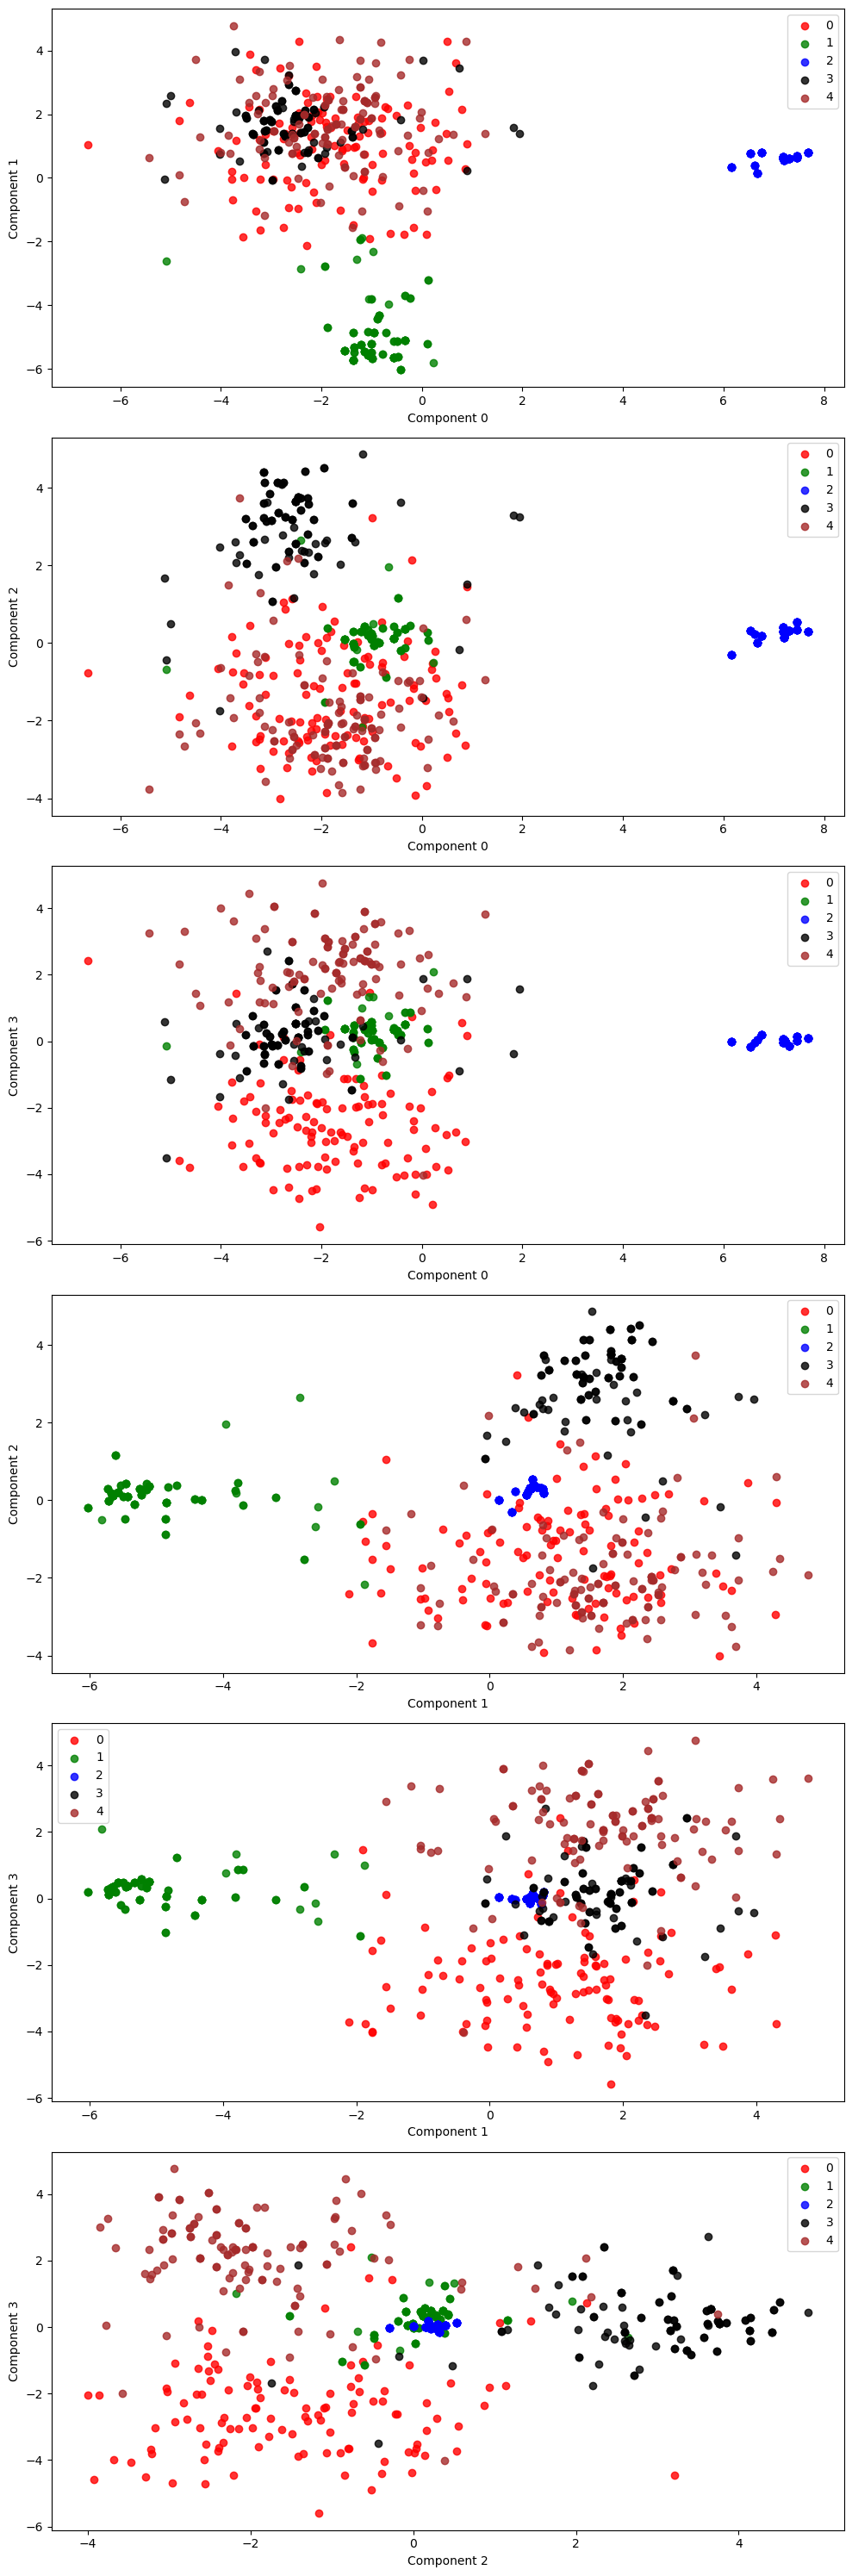

In [283]:
# Visualize LDA results
target_class = np.unique(y_res)
colors = ["red", "green", "blue", "black", "brown"]
# Get number of components
n_components = X_lda.shape[1]
pairs = []
for xi in range(n_components):
    for yi in range(n_components):
        if yi > xi:
            pairs.append((xi,yi))

# Setup subplots
fig, ax = plt.subplots(len(pairs), 1, figsize=(10,30))

# Get every combination of LDA components
# Setting up all values to plot
for ax_i,(xi,yi) in enumerate(pairs):
    # Plot data
    for color, i, c in zip(colors, [0,1,2,3,4], target_class):
        ax[ax_i].scatter(X_lda[y_train == i, xi],
            X_lda[y_train == i, yi],
            alpha=.8, color=color, label=c)
    # Add legend
    ax[ax_i].set_xlabel(f"Component {xi}")
    ax[ax_i].set_ylabel(f"Component {yi}")
    ax[ax_i].legend(loc="best")

# Set title on the plot
#plt.title("Linear Discriminant Analysis")
plt.tight_layout()

## Training SVM Classifier with Transformed Data

In [284]:
# Run LDA on X test data to match dimensionality of train data
X_test_lda = lda_model.transform(X_test)

In [285]:
# Use components to train SVM classifier
svm_clf = SVC(kernel="rbf", random_state=10)
svm_model = svm_clf.fit(X_lda, y_train)
y_pred = svm_model.predict(X_test_lda)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {acc:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Accuracy: 0.477
F1 score: 0.450
Precision: 0.438
Recall: 0.477


c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
